<a href="https://colab.research.google.com/github/ImadEddineBek/SCAI-COORD-IMAD/blob/main/Remove_backgrounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O data.tar https://app.supervise.ly/h5un6l2bnaz1vj8a9qgms4-public/tasks/archives/J/v/Ds/dLXhjLxvrklYeeYuSLwvywPBn5JlPEw0Q6rzg9oD0z7xhZMQDm6lj2cyESWINH6YemVrTauZvLrN3XFGbHvUP47yVqMo5Jim8J28iycki3Q28lvJMFBgQcjZh0je.tar

--2020-11-07 10:18:39--  https://app.supervise.ly/h5un6l2bnaz1vj8a9qgms4-public/tasks/archives/J/v/Ds/dLXhjLxvrklYeeYuSLwvywPBn5JlPEw0Q6rzg9oD0z7xhZMQDm6lj2cyESWINH6YemVrTauZvLrN3XFGbHvUP47yVqMo5Jim8J28iycki3Q28lvJMFBgQcjZh0je.tar
Resolving app.supervise.ly (app.supervise.ly)... 136.243.97.171
Connecting to app.supervise.ly (app.supervise.ly)|136.243.97.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23603200 (23M) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>]  22.51M  73.5MB/s    in 0.3s    

2020-11-07 10:18:40 (73.5 MB/s) - ‘data.tar’ saved [23603200/23603200]



In [ ]:
!tar -xf  'data.tar'

In [ ]:
!rm -r SCAI-COORD-IMAD

In [ ]:
!git clone https://github.com/ImadEddineBek/SCAI-COORD-IMAD.git

Cloning into 'SCAI-COORD-IMAD'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 2), reused 25 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [ ]:
!cp "/content/drive/My Drive/Research/paris/Stringed instruments (10981).zip" ./

In [ ]:
!unzip -qq "Stringed instruments (10981).zip"

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!pip install alphashape

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from glob import glob
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from pylab import rcParams
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from detectron2.structures import BoxMode
import pickle
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape


def convert_img_to_json(X,clustering_labels):
    objs = []
    for i in range(0, clustering_labels.max()+1):
        X_i = X[clustering_labels==i]
        # import alphashape
        # alpha_shape = alphashape.alphashape(X_i)
        # alpha_shape.plot()
        plt.show()
        # print(len(X_i))
        coords = np.array([np.min(X_i,axis=0),np.max(X_i,axis=0)])*5
        for alpha in np.arange(7.6,-5.1,-0.1):
          try:
            hull = alphashape.alphashape(X_i, alpha)
            hull_pts = hull.exterior.coords.xy
            break
          except:
            pass
        contours = []
        try:
          for i in range(len(hull_pts[0])):
              contours.append(hull_pts[0][i]*5)
              contours.append(hull_pts[1][i]*5)
        except:
          hull = ConvexHull(X_i)
          contours = []
          for simplex in hull.vertices:
              contours.extend(X_i[simplex])
        # print(coords)
        obj = {
               "bbox": [coords[0][0], coords[0][1], coords[1][0], coords[1][1]],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [contours],
                "category_id": 0,
                "iscrowd": 0
              }
        objs.append(obj)
    return objs

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


def load_object(file_name):
  with open(file_name, 'rb') as f:
    x =  pickle.load(f)
    # print(x)
  return x

import glob
import os
import cv2
import numpy as np
import glob
from pathlib import Path

images = glob.glob("/content/Stringed instruments (10981)/*")
def load_image(img_name):
    img = cv2.imread(img_name, cv2.IMREAD_COLOR)
    return img


def reduce_size_of_both_images(img_name):
    print(img_name)
    train_img = load_image(img_name)
    scale_percent = 20
    # calculate the 50 percent of original dimensions
    width = int(train_img.shape[1] * scale_percent / 100)
    height = int(train_img.shape[0] * scale_percent / 100)
    # dsize
    dsize = (width, height)
    output = cv2.resize(train_img , dsize)
    print("processed"+img_name)
    cv2.imwrite("processed"+img_name.replace("/content/Stringed instruments (10981)",""), output)

def main():
  for img_name in images:
      img = load_image(img_name)
      reduce_size_of_both_images(img_name)

main()
    
recrods = []
images = glob.glob("/content/processed/*")
for i, img_name in enumerate(images):
    print(img_name)
    if i > 10:
        break
    img = cv2.imread(img_name)
    mask = np.zeros(img.shape[:2],np.uint8)
    h, w, _ = img.shape
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (w//20,h//20,w-w//20,h-h//20)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    X, y = np.nonzero(mask2)
    X = pd.DataFrame({'x1': y, 'x2': X}).values
    # print(len(X))
    dbscan = DBSCAN(eps=20, min_samples=200).fit(X)
    cluster_labels = dbscan.labels_
    record = {}
    objs = convert_img_to_json(X, cluster_labels)
    record["file_name"] = img_name.replace("/content/processed/",'/content/SCAI-COORD-IMAD/Stringed instruments (10981)/')
    record["image_id"] = 0
    record["height"] = h
    record["width"] = w
    record["annotations"] = objs
    recrods.append(record)
save_object(recrods, 'recrods.pkl')


def get_all(d="train"):
  return load_object('recrods.pkl')

# from detectron2.data import DatasetCatalog, MetadataCatalog
# d = "train"
# DatasetCatalog.register("mask_" + d, lambda d=d: get_all())
# MetadataCatalog.get("mask_" + d).set(thing_classes=['figure'])
# balloon_metadata = MetadataCatalog.get("mask_train")


/content/processed/F547_01.jpg


In [ ]:
!zip -r processed_data.zip processed/

In [2]:
!cp processed_data.zip "/content/drive/My Drive/Research/paris/"

In [ ]:
!ls "processed/content/SCAI-COORD-IMAD/"

ls: cannot access 'processed/content/SCAI-COORD-IMAD/': No such file or directory


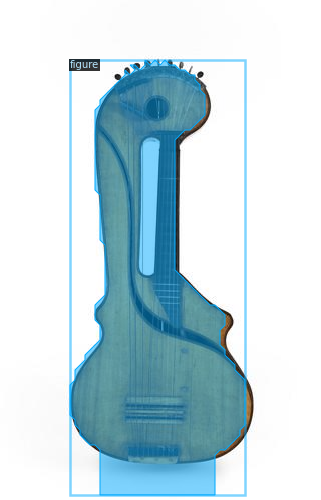

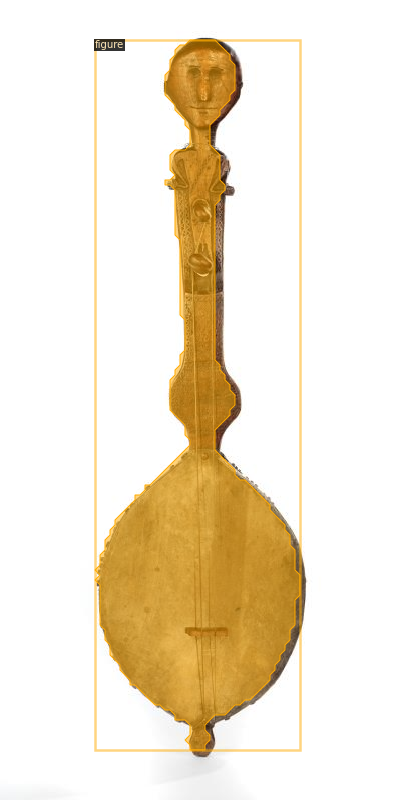

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import os, json, cv2, random
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

dataset_dicts = get_all()
# !cp 'all_data.pkl' "./drive/My Drive/Research/paris/"
for d in random.sample(dataset_dicts, 2):
    # print(d["file_name"])
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])